In [8]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["image.interpolation"] = "nearest"
mpl.rcParams["image.origin"] = "lower"

from astropy.io import fits
import os
os.chdir("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits")

In [9]:
# Define all the files to be compared
root = "GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
wangetal_slitless = fits.open("GRS_FOV0_roll0_dx0_dy0_SCA1_slitless_final.fits")[1].data # Baseline for comparison

full_sim = fits.open("integrated_sim.fits")[1].data
cutout_sim = fits.open("cutout_sim.fits")[1].data

In [10]:
# Background subtraction
from photutils.background import Background2D, MedianBackground
bkg_estimator = MedianBackground()
bkg = Background2D(wangetal_slitless, (511,511), filter_size=(7,7), bkg_estimator=bkg_estimator)
wangetal_slitless -= bkg.background

In [11]:
min = wangetal_slitless.min()
max = wangetal_slitless.max()
median = np.median(wangetal_slitless)
mean = np.mean(wangetal_slitless)

print("Wang et al stats:", f"min: {min}", f"max: {max}", f"median: {median}", f"mean: {mean}", '', sep='\n')

min = full_sim.min()
max = full_sim.max()
median = np.median(full_sim)
mean = np.mean(full_sim)

print("Full_sim stats:", f"min: {min}", f"max: {max}", f"median: {median}", f"mean: {mean}", '', sep='\n')

min = cutout_sim[723:1723, 1624:2624].min()
max = cutout_sim[723:1723, 1624:2624].max()
median = np.median(cutout_sim[723:1723, 1624:2624])
mean = np.mean(cutout_sim[723:1723, 1624:2624])

print("Cutout_sim stats:", f"min: {min}", f"max: {max}", f"median: {median}", f"mean: {mean}", '', sep='\n')

Wang et al stats:
min: -0.24653928851698248
max: 117.38539732765788
median: 0.0040989091317787385
mean: 0.08249146230912587

Full_sim stats:
min: 0.0
max: 110.00071716308594
median: 0.02012673020362854
mean: 0.10023240000009537

Cutout_sim stats:
min: 0.0
max: 110.00071716308594
median: 0.02525518834590912
mean: 0.372239351272583



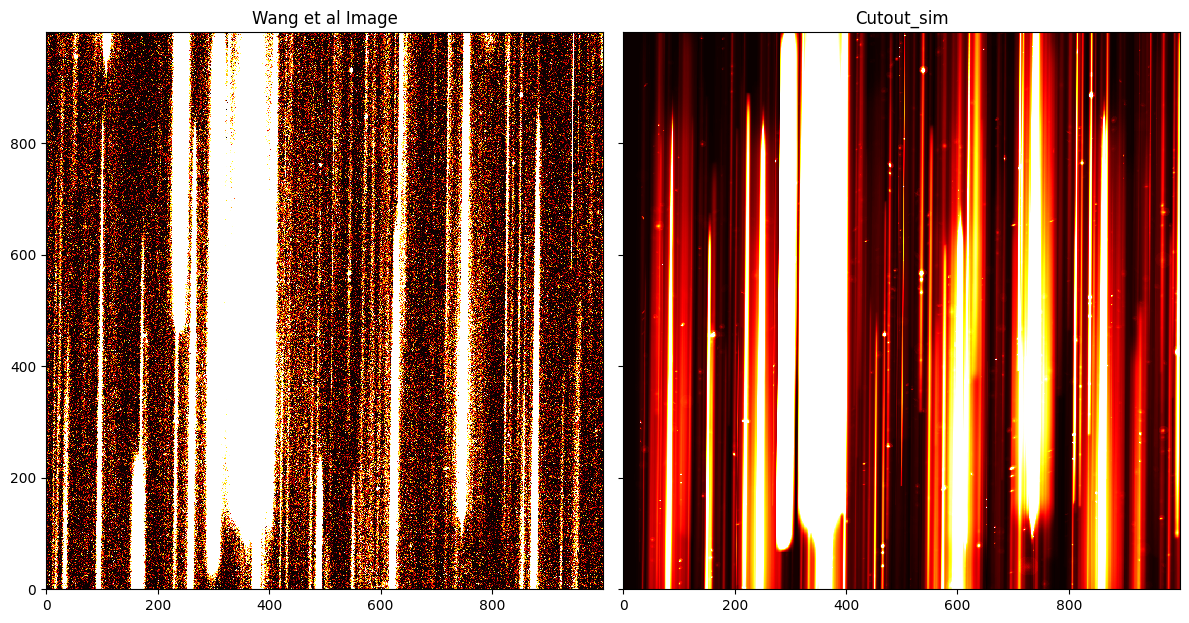

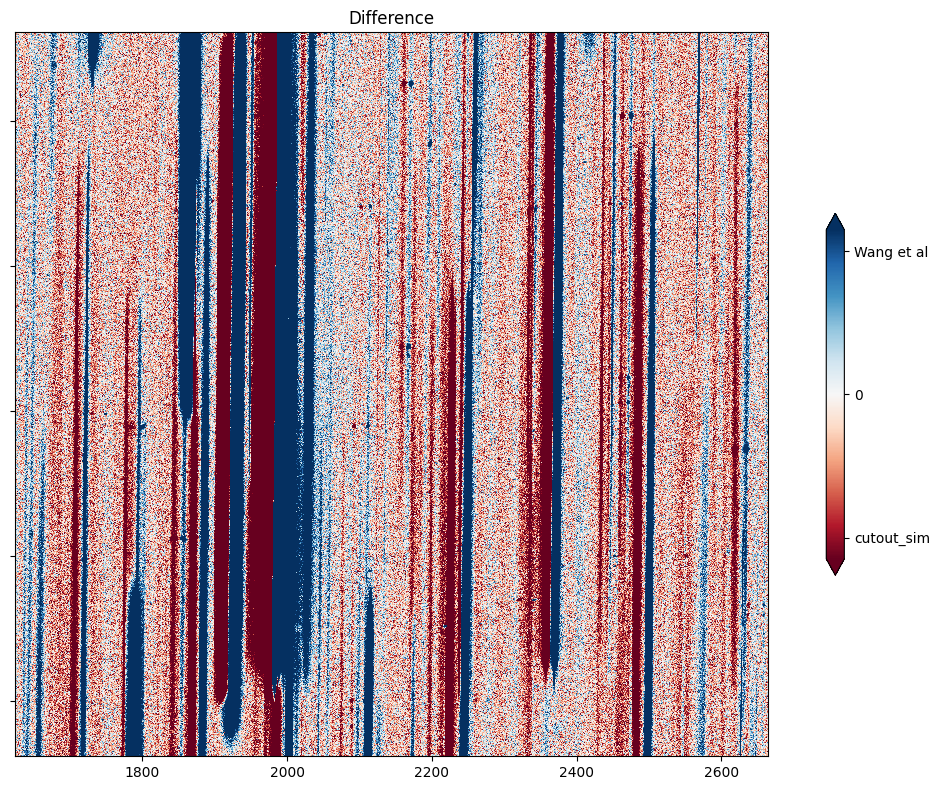

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(wangetal_slitless[723:1723, 1624:2624], cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al Image")

ax2.imshow(cutout_sim[723:1723, 1624:2624], cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax2.set_title("Cutout_sim")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()
plt.show()

# Assume a scalar relation and apply correction
scalar = np.median(wangetal_slitless[723:1723, 1624:2624]) / np.median(cutout_sim[723:1723, 1624:2624])
# difference = wangetal_slitless - (cutout_sim * scalar)
difference = wangetal_slitless - cutout_sim

fig, ax = plt.subplots(figsize=(12, 8))

dif = ax.imshow(difference, cmap=plt.cm.RdBu, vmin=-difference.max()/1000, vmax=difference.max()/1000)
ax.set_yticklabels([])
ax.set_title("Difference")
cb = plt.colorbar(dif, shrink = 0.5, extend="both")

cb.set_ticks([0.1, 0, -0.1], labels=['Wang et al', 0, 'cutout_sim'])

ax.set_xlim(1624, 2664)
ax.set_ylim(723, 1723)

fig.tight_layout()
plt.show()

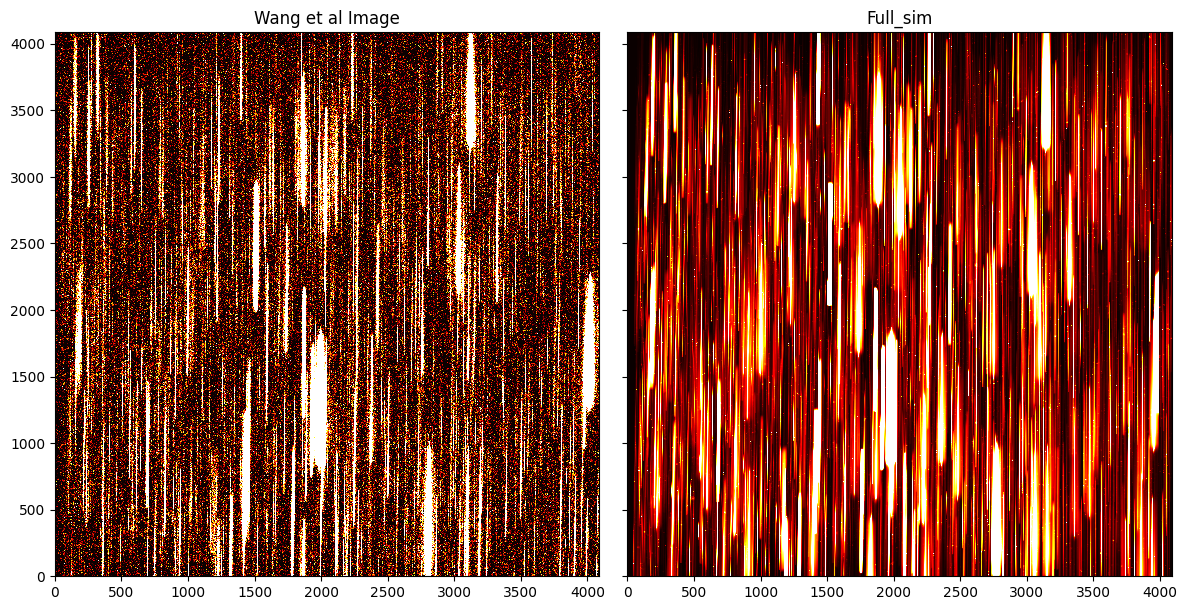

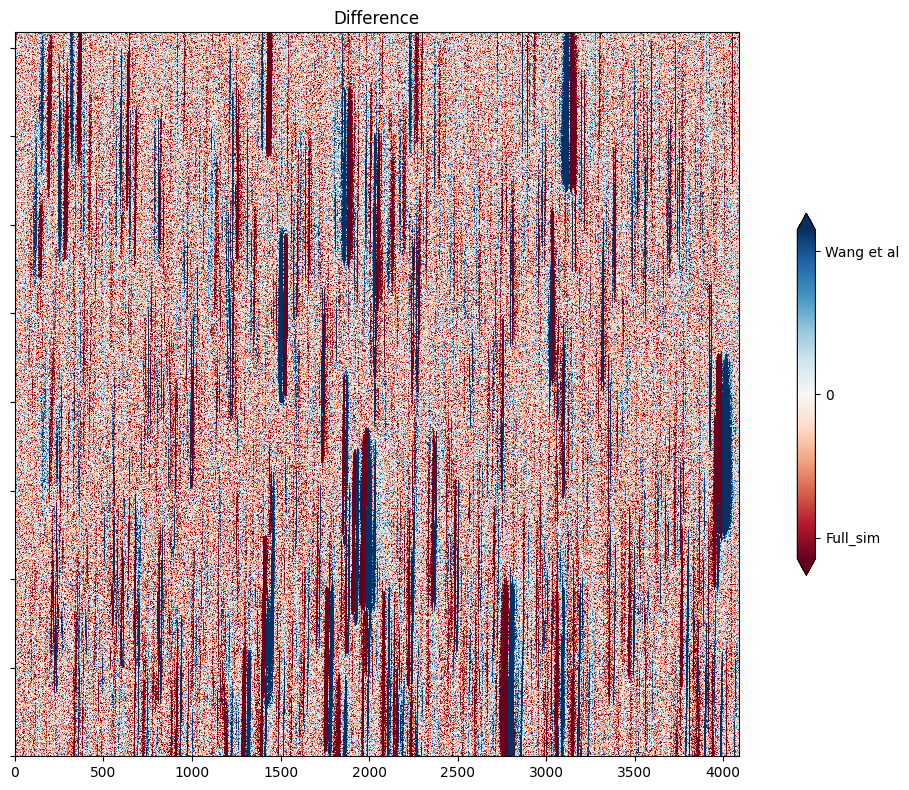

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(wangetal_slitless, cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al Image")

ax2.imshow(full_sim, cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax2.set_title("Full_sim")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()
plt.show()

# Assume a scalar relation and apply correction
scalar = np.median(wangetal_slitless) / np.median(full_sim)
# difference = wangetal_slitless - (full_sim * scalar)
difference = wangetal_slitless - full_sim

fig, ax = plt.subplots(figsize=(12, 8))

dif = ax.imshow(difference, cmap=plt.cm.RdBu, vmin=-difference.max()/1000, vmax=difference.max()/1000)
ax.set_yticklabels([])
ax.set_title("Difference")
cb = plt.colorbar(dif, shrink = 0.5, extend="both")

cb.set_ticks([0.1, 0, -0.1], labels=['Wang et al', 0, 'Full_sim'])

fig.tight_layout()
plt.show()

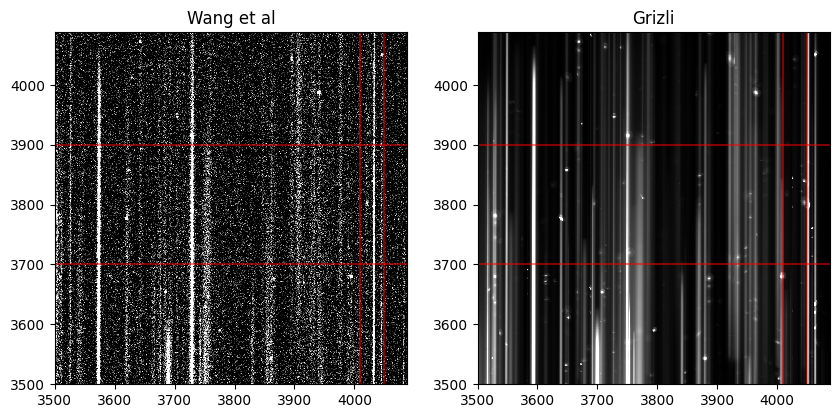

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.imshow(wangetal_slitless, cmap='grey', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al")
ax1.set_xlim(3500, 4088)
ax1.set_ylim(3500,4088)

ax1.axvline(4010, c='r', alpha=0.5)
ax1.axvline(4050, c='r', alpha=0.5)
ax1.axhline(3700, c='r', alpha=0.5)
ax1.axhline(3900, c='r', alpha=0.5)

ax2.imshow(full_sim, cmap='grey', vmin=0, vmax=wangetal_slitless.max()/1000)
ax2.set_title("Grizli")
ax2.set_xlim(3500, 4088)
ax2.set_ylim(3500,4088)

ax2.axvline(4010, c='r', alpha=0.5)
ax2.axvline(4050, c='r', alpha=0.5)
ax2.axhline(3700, c='r', alpha=0.5)
ax2.axhline(3900, c='r', alpha=0.5)